# Statistical Analysis of Wine Alcohol Content 

## Introduction

The dataset is  [Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality), consisting of information about red vinho verde wine samples, from the north of Portugal. The goal is to test the claim that wines with a higher quality rating have a higher median alcohol content than wines with a lower quality rating.

## Data Understanding

In [93]:
# Import the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')


In [94]:
# Import and peview the data
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The column `quality` contains integers for various quality levels. We calculate the median of these integers to determine the classification of the wine as either `high` or`low` quality

In [95]:
df['quality'].median()

6.0

We classify wines with quality of less than 6 as low quality and wines of quality equal to or greater than 6 as high quality.


In [96]:
# New column 'level_of_quality' for classifying quality
df.loc[df['quality'] < 6, 'level_of_quality'] = 'low'
df.loc[df['quality'] >= 6, 'level_of_quality'] = 'high'

# Confirm new column
df['level_of_quality'].value_counts()

high    855
low     744
Name: level_of_quality, dtype: int64

Creating a plot of the probability distributions for samples to visually inspect the differences present between mean and standard deviation. Plotting both samples' distributions and inspecting the overlap using seaborn to get an idea of how different the samples might be from one another.

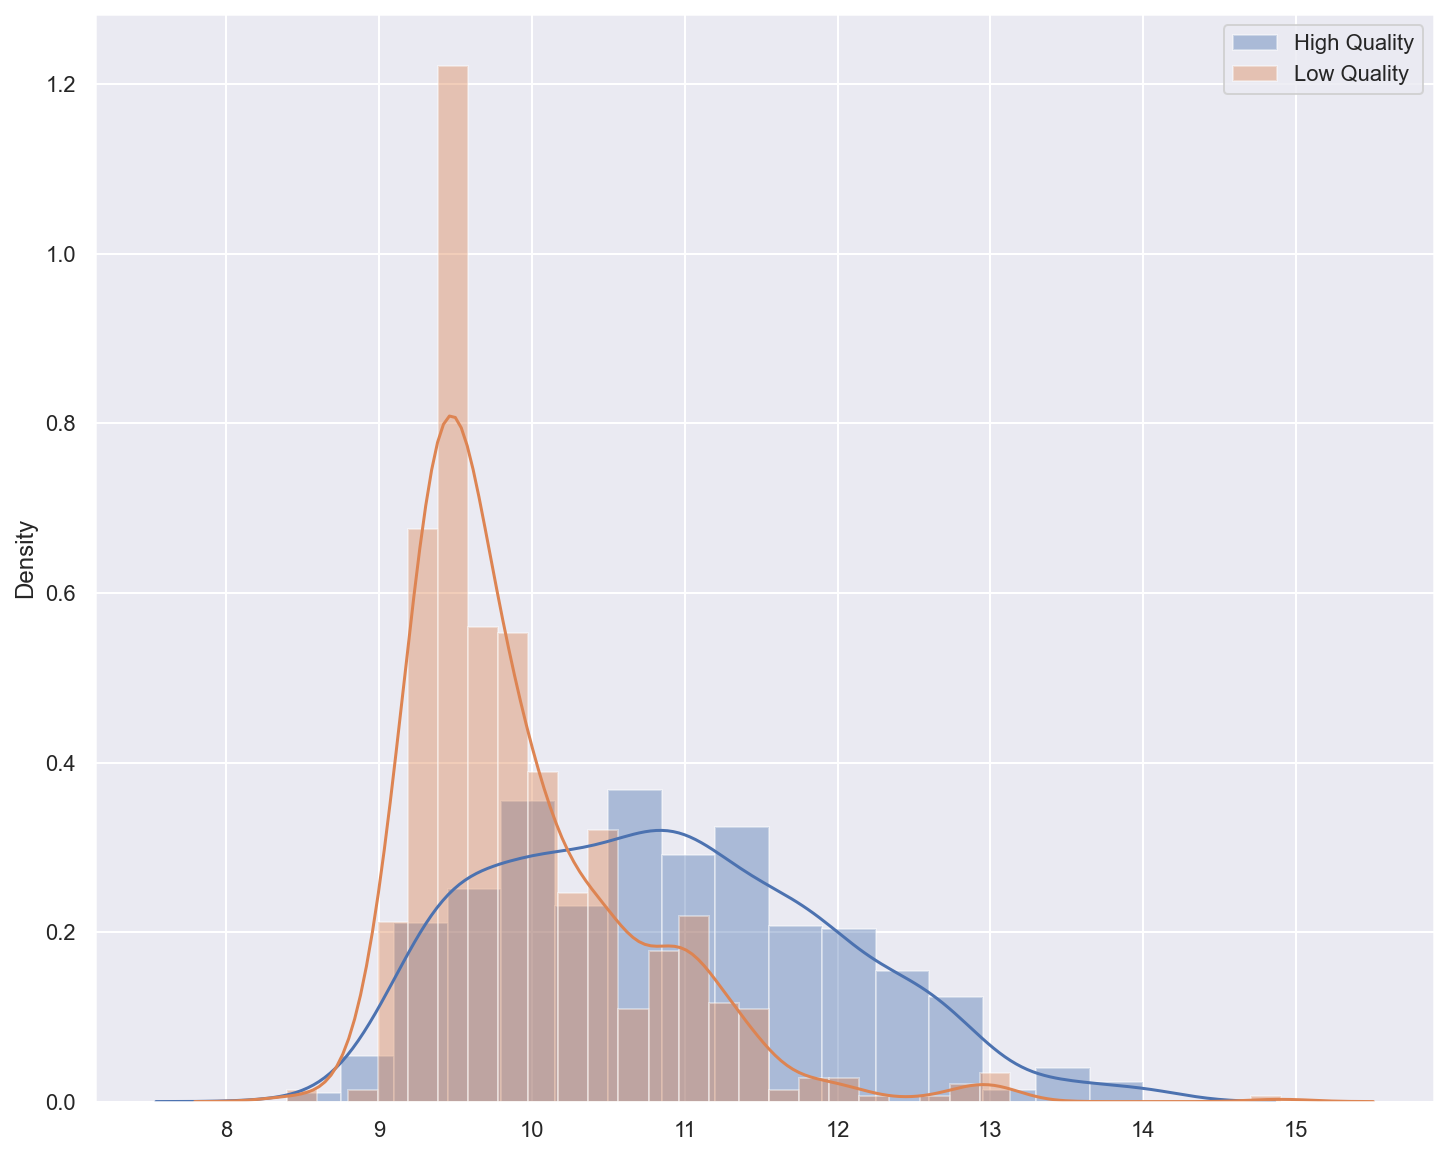

In [99]:
# Create a plot showing overlapping of distribution means and sds for inspection
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(df.loc[(df['level_of_quality'] == 'high'), ['alcohol']], label='High Quality')
sns.distplot(df.loc[(df['level_of_quality'] == 'low'), ['alcohol']], label='Low Quality')
plt.legend();

The distribution of the data is a near normal distribution. There are some slight differences between the median, mean and standard deviation of the high quality and low quality wines. This is a good sign to further our experimentation and to calculate whether the difference is significant, or not.

Calculating the median difference between both groups.

In [90]:
high_quality_sample = df.loc[df['level_of_quality'] == 'high']
low_quality_sample = df.loc[df['level_of_quality'] == 'low']

# Difference of the medians
median_diff = high_quality_sample['alcohol'].median() - low_quality_sample['alcohol'].median()
median_diff

1.1000000000000014

## Stating the Hypotheses
### The Null Hypothesis
>**$H_{0}$: Wines with higher quality rating have less or equal median alcohol content than wines with lower quality rating.**

### The Alternative Hypothesis
>**$H_{1}$: Wines with higher quality rating have higher median alcohol content than wines with lower quality rating.**

From the hypothesis, the test is a two-sample one-tail test.

## Significance Level


We select a significance level of 0.05.

## Calculating the p-value


In [68]:
stats.ttest_ind(high_quality_sample['alcohol'], low_quality_sample['alcohol'])

Ttest_indResult(statistic=19.292349918694175, pvalue=1.0239802386368774e-74)

## Interpretation of p-value
The p-value (1.0239802386368774e-74) is significantly lower than the alpha (0.05).

## Conclusion

The null hypothesis is rejected. The increase in median alcohol content in wines with a higher quality is significant at the 0.05 level.